In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

## Simple Linear Regression
`y = b0 + b1x1 + e`

- y - Dependent Variable
- b0 - Intercept
- x1 - Independent Variable
- b1 - Slope for x1
- e - Error or Residual

\begin{equation*}
\text{Slope of independent variable (x1)}  = \frac{\text{Covariance of x and y}}{\text{(Varianace of X)}} 
\end{equation*}
\begin{equation*}
\text{Slope of independent variable (x1)}  = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})^2}}
\end{equation*}

Note: Correlation formula is very simlar to above. In denominator, instead of covariance of x its STD of x and y
\begin{equation*}
\text{Correlation of x and y}  = \frac{(x-\bar{x})(y-\bar{y})}{STD. of X * STD. of Y}
\end{equation*}

In [3]:
net_profit_margin = np.array([4,5,10,9,5,6,12,3]) 
R_and_D_Expense = np.array([8,10,6,5,7,9,5,10]) 
slope, intercept = np.polyfit(R_and_D_Expense, net_profit_margin, 1)
print(slope)
print(intercept)

-1.300000000000001
16.500000000000007


In [4]:
def slope(dependent, independent):
    dep_mean=np.mean(dependent)
    indep_mean=np.mean(independent)
    dep = dependent - dep_mean
    indep = independent - indep_mean
    numerator = (np.sum(dep * indep))/(len(dependent))
    return (numerator/np.var(independent))

In [5]:
slope(net_profit_margin,R_and_D_Expense)

-1.3

## Linear regression with Kaggle Datasets

### Data Clean up!!

In [2]:
ds = pd.read_csv("./Student_Performance.csv")
## https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [6]:
ds.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [22]:
ds["Hours Studied"].isnull().any() or ds["Performance Index"].isnull().any()
ds['Extracurricular Activities'] = ds['Extracurricular Activities'].map({'Yes':1,'No':0})

<Axes: >

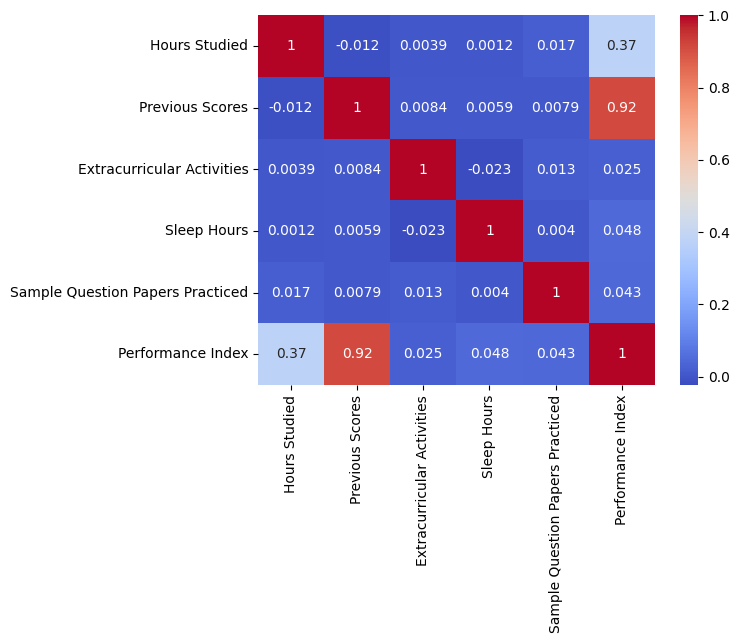

In [23]:
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')

## Plot hours studied with performance index

In [25]:
sns.regplot(x='Hours Studied', y = 'Performance Index', data = ds )
plt.show()

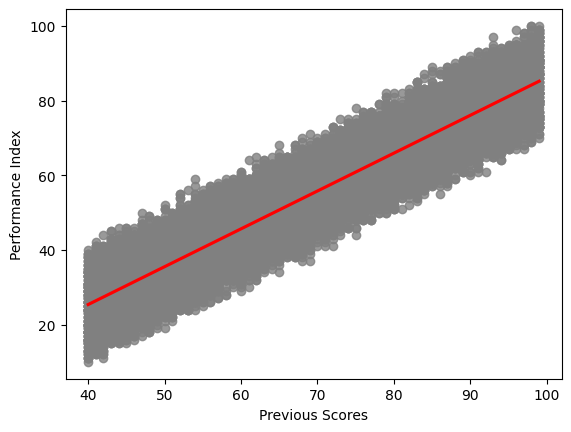

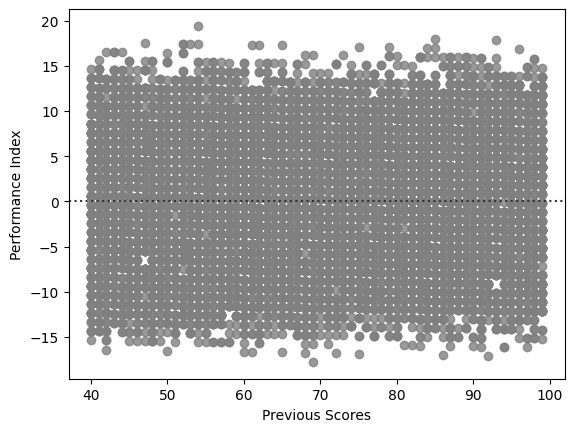

In [37]:
sns.regplot(x='Previous Scores', y = 'Performance Index', data = ds, scatter_kws={"color": "grey"}, line_kws={"color": "red"} )
plt.show()
sns.residplot(x='Previous Scores', y = 'Performance Index', data = ds, scatter_kws={"color": "grey"}, line_kws={"color": "red"} )
plt.show()

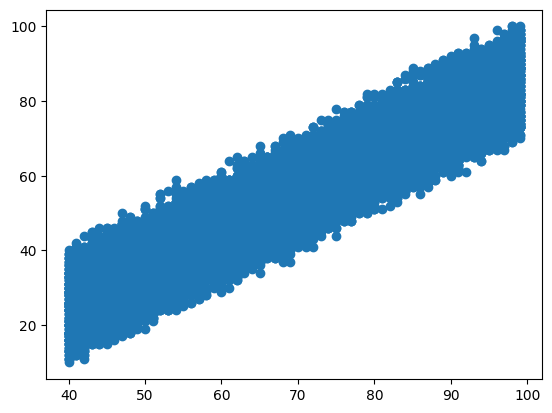

In [15]:
x = ds['Previous Scores'].values
y = ds['Performance Index'].values
model = np.poly1d(np.polyfit(x, y, 1))
#add fitted polynomial line to scatterplot
polyline = np.linspace(ds['Previous Scores'].min(), ds['Previous Scores'].max())
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

In [6]:
result = sm.OLS(ds['Performance Index'], ds['Previous Scores']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.552e+05
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:05:15   Log-Likelihood:                         -35674.
No. Observations:               10000   AIC:                                  7.135e+04
Df Residuals:                    9999   BIC:                                  7.136e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Previous Scores     0.8081      0.001    674.709      0.000       0.806       0.810
==============================================================================
Omnibus:                      506.982   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.634
Skew:                          -0.005   Prob(JB):                     4.47e-44
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""